In [1]:
import numpy as np
import tensorflow as tf 
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
X = np.array([[18], [23], [28], [33], [38], [43], [48], [58], [53], [63]])
X

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [58],
       [53],
       [63]])

In [3]:
y = np.array([[871], [1132], [1042], [1356], [1488], [1569], [1638], [1754], [1866], [1900]])
y

array([[ 871],
       [1132],
       [1042],
       [1356],
       [1488],
       [1569],
       [1638],
       [1754],
       [1866],
       [1900]])

In [4]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)

In [5]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 1.21854359],
       [ 0.87038828],
       [ 1.5666989 ]])

In [6]:
y

array([[-1.75751985],
       [-0.98083058],
       [-1.24865447],
       [-0.31424669],
       [ 0.07856167],
       [ 0.31960317],
       [ 0.52493481],
       [ 0.87013004],
       [ 1.20342199],
       [ 1.3045999 ]])

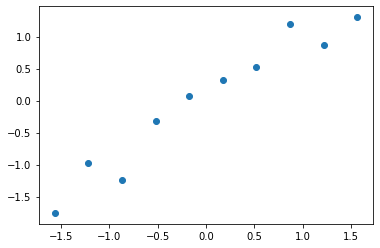

In [7]:
%matplotlib inline
plt.scatter(X, y)

# Simple linear regression formula
Y = b0 + b1 * x

In [8]:
np.random.seed(0)
np.random.rand(2)

array([0.5488135 , 0.71518937])

In [9]:
b0 = tf.Variable(0.54)
b1 = tf.Variable(0.71)

In [10]:
error = tf.losses.mean_squared_error(y, (b0 + b1 * X))
optmizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optmizer.minimize(error)
init = tf.global_variables_initializer()

In [11]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(1000):
        sess.run(train)
    b0_final, b1_final = sess.run([b0, b1])


In [12]:
b0_final

0.07293496

In [13]:
b1_final

0.9320601

In [14]:
prevision = b0_final + b1_final * X

In [15]:
prevision

array([[-1.38732261],
       [-1.06282093],
       [-0.73831924],
       [-0.41381756],
       [-0.08931588],
       [ 0.2351858 ],
       [ 0.55968749],
       [ 1.20869085],
       [ 0.88418917],
       [ 1.53319253]])

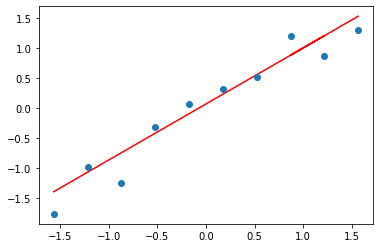

In [16]:
plt.plot(X, prevision, color='red')
plt.plot(X, y, 'o')


In [17]:
predictor = scaler_y.inverse_transform( b0_final + b1_final * scaler_X.transform([[40]]))
predictor

array([[1475.20458014]])

In [18]:
y1 = scaler_y.inverse_transform(y)
y1

array([[ 871.],
       [1132.],
       [1042.],
       [1356.],
       [1488.],
       [1569.],
       [1638.],
       [1754.],
       [1866.],
       [1900.]])

In [19]:
prevision1 = scaler_y.inverse_transform(prevision)
prevision1

array([[ 995.40171922],
       [1104.44782397],
       [1213.49392873],
       [1322.54003348],
       [1431.58613824],
       [1540.63224299],
       [1649.67834774],
       [1867.77055725],
       [1758.7244525 ],
       [1976.81666201]])

In [20]:
mae = mean_absolute_error(y1, prevision1)
mse = mean_squared_error(y1, prevision1)

In [21]:
mae

75.12305237701926

In [22]:
mse

8124.086669257769